# N-gram Language model


In [ ]:
import math
import random
import numpy as np

<a name='1'></a>
## Load and Preprocess Data

<a name='1.1'></a>


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import json
os.chdir("/content/drive/My Drive/corpus/")

with open('train/train.json',"r",encoding='utf-8') as json_file:
    data = json.load(json_file)

In [ ]:
len(data)

100000

In [ ]:
data[0]

'به گزارش\r\nگروه وبگردی باشگاه خبرنگاران جوان\r\n، به نظر می\u200cرسد دور تازه حملات جمهوری خواهان ایالات متحده به توییتر، باعث برانگیخته شدن عصبانیت دونالد ترامپ نیز شده و او نیز در اظهار نظری جدید اعلام کرده که توییتر، فیس بوک و گوگل حد و حدود خود را نمی\u200cدانند و نسبت به جمهوریخواهان اجحاف می\u200cکنند.\r\nترامپ رئیس جمهور ایالات متحده در جریان کنفرانس مطبوعاتی مشترک با رئیس جمهور برزیل گفت: "ما باید کاری را درباره شرکت\u200cهای شبکه\u200cهای اجتماعی انجام دهیم. " وی در بخشی دیگر از سخنانش نیز مدعی شد که شرکت\u200cهای شبکه\u200cهای اجتماعی در برابر جمهوریخواهان بی\u200cرحم و تبعیض آمیز رفتار می\u200cکنند.\r\nترامپ تاکید کرد: واضح است که رفتاری خاص در حال اجرا در فیس بوک، گوگل و توییتر است. من فکر می\u200cکنم ما باید به نقطه شروع این رفتار برسیم و فکر می\u200cکنم منصفانه است که بگوییم ما باید کاری در مورد آن انجام دهیم. "\r\nنظرات جدید ترامپ پس از آن مطرح شده است که جمهوریخواهان تقاضای جریمه ۲۵۰ میلیون دلاری از توییتر کردند. تقاضایی که اکنون در دادگاه در دست بررسی است و مرتبط با 

In [ ]:
import re

def split_to_sentences(data):

    sentences = re.split('\.|\؟',data)

    sentences = [s.strip() for s in sentences]
    sentences = [s for s in sentences if len(s) > 2]
    
    return sentences

In [ ]:
def tokenize(text):

    # Initialize the list of lists of tokenized sentences
    tokenized = []
    
    for t in text:
        
        # Clean the input sentences

        t = re.sub(r'[^\w\d.؟\s]+','',t)
        t = re.sub(r'[a-zA-Z]+','',t)
        t = re.sub(r'_' , '' , t)
        t = re.sub(r'\d+' , 'N' , t)

        t = re.sub(r'\.' , ' .' , t)
        t = re.sub(r'؟' , ' ؟' , t)

        
        tokens = t.split()
        tokenized.append(tokens)
    
    
    return tokenized

In [ ]:
# test
sentences = ["من به مدرسه می روم.", "Leaves are ؟ سبز", "there was 20 roses there."]
tokenize(sentences)

[['من', 'به', 'مدرسه', 'می', 'روم', '.'], ['؟', 'سبز'], ['N', '.']]

In [ ]:
tokenized_data =tokenize(data)

In [ ]:
print("{} data for training ".format(
    len(tokenized_data)))

train_list=[]
for i in range(len(tokenized_data)):
    train_list.extend(tokenized_data[i])
print('\n{} tokens for training '.format(
    len(train_list)))

print('\n{} unique tokens for training '.format(
    len(set(train_list))))

100000 data for training 

34457591 tokens for training 

252770 unique tokens for training 


In [ ]:
def count_words(tokenized_sentences):
    
    word_counts = {}
    
    # Loop through each sentence
    for sentence in tokenized_sentences:
        
        # Go through each token in the sentence
        for token in sentence: 
            if not token in word_counts.keys():
                word_counts[token] = 1
            
            else:
                word_counts[token] += 1

    return word_counts

In [ ]:
# test
tokenized_sentences =[tokenized_data[1250]]
count_words(tokenized_sentences)

{'.': 8,
 'N': 4,
 'آمارها': 1,
 'آن': 3,
 'آکادمیک': 1,
 'اجناس': 2,
 'ادامه': 1,
 'ادبیات': 1,
 'ارتباط': 1,
 'از': 7,
 'است': 6,
 'اشاره': 2,
 'اطلاعات': 1,
 'اظهار': 1,
 'افزایش': 4,
 'افزود': 1,
 'اقتصادی': 1,
 'الکترونیک': 1,
 'اما': 3,
 'انتشارات': 3,
 'انتهای': 1,
 'انگلیسی': 1,
 'اولین': 1,
 'ایران': 3,
 'این': 4,
 'اینکه': 1,
 'با': 3,
 'بابت': 1,
 'باشد': 1,
 'باشعور': 2,
 'باشگاه': 1,
 'باعث': 3,
 'بالاتر': 1,
 'باید': 1,
 'بد': 1,
 'بر': 2,
 'به': 8,
 'بگویم': 1,
 'بیان': 1,
 'بیش': 1,
 'تا': 1,
 'تاثیرگذاری': 1,
 'تاست': 1,
 'تایماز': 3,
 'ترجمه': 2,
 'ترکی': 1,
 'ترکیه': 1,
 'تفاوت': 1,
 'تمامی': 1,
 'تنها': 1,
 'تومانی': 1,
 'تیراژ': 2,
 'جهان': 1,
 'جوابگو': 1,
 'جوان': 1,
 'جیب': 1,
 'حدودی': 1,
 'حوزه': 1,
 'خبرنگار': 1,
 'خبرنگاران': 1,
 'خبری': 1,
 'خصوص': 3,
 'خوب': 1,
 'خودرو': 1,
 'خیری': 1,
 'دارد': 1,
 'داشت': 1,
 'در': 12,
 'دقیقه': 1,
 'دلار': 2,
 'دلالان': 2,
 'دهان': 1,
 'دولت': 1,
 'را': 3,
 'رسانهها': 1,
 'زبان': 1,
 'سالانه': 1,
 'سایر': 1,
 'سرانه': 4,

In [ ]:
word_counts = count_words(tokenized_data)

In [ ]:
print("Number of all tokens:")
print(sum(word_counts.values()))
print("\nNumber of unique tokens:")
print(len(word_counts))

Number of all tokens:
34457591

Number of unique tokens:
252770


In [ ]:
from collections import Counter
def get_words_with_threshold_rank_frequency(tokenized, rank_threshold):
    closed_vocab = {}
    
    # Get the word counts of the tokenized sentences
    word_counts = count_words(tokenized)
    closed_voc=Counter(word_counts).most_common(rank_threshold)
    for a, b in closed_voc: 
        closed_vocab[a] = b
    return closed_vocab

In [ ]:
#test
tmp_closed_vocab = get_words_with_threshold_rank_frequency(tokenized_data, 5)
print(f"\nClosed vocabulary with rank frequency:")
print(tmp_closed_vocab)


Closed vocabulary with rank frequency:
{'و': 1572065, 'در': 1229331, 'به': 989828, '.': 967221, 'از': 793662}


## Handle out ot vocabulary words

In [ ]:
def replace_oov_words_by_unk(tokenized, vocabulary, unknown_token="<unk>"):
    
    replaced_tokenized = []
    
    for sentence in tokenized:
        
        replaced_sentence = []

        for token in sentence:
            if token in vocabulary.keys(): 
                replaced_sentence.append(token)
            else:
                replaced_sentence.append(unknown_token)

        replaced_tokenized.append(replaced_sentence)
        
    return replaced_tokenized

In [ ]:
def preprocess_data(train_list, rank_threshold):

    vocabulary = get_words_with_threshold_rank_frequency(train_list , rank_threshold)
    train_data_replaced = replace_oov_words_by_unk(train_list, vocabulary, unknown_token="<unk>")
  
    return train_data_replaced, vocabulary

In [ ]:
train_data_processed, vocabulary = preprocess_data(tokenized_data,rank_threshold=10000)

In [ ]:
print("First preprocessed training sample:")
print(train_data_processed[100])
print()

print("Most frequent vocabularies:")
print(vocabulary)
print()
print("Size of vocabulary:", len(vocabulary))

First preprocessed training sample:
['به', 'گزارش', 'گروه', 'فیلم', 'و', 'صوت', 'باشگاه', 'خبرنگاران', 'جوان', 'پخت', '<unk>', 'از', 'دیرباز', 'جزو', 'مراسم', 'آیینی', 'و', 'تاریخی', 'مردم', 'ایران', 'است', 'و', 'یکی', 'از', 'رسوم', 'زیبا', 'و', 'پرطرفدار', 'است', 'که', 'هرساله', 'نزدیک', 'به', 'عید', 'نوروز', 'برگزار', 'میشود', '.', 'بیشتر', 'بخوانید', 'N', 'تن', '<unk>', '<unk>', 'مهمان', 'سفره', 'N', 'هزار', 'خانواده', 'شیرازی', '.', '.', '.', 'N', 'N', 'N', '.', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '.', '.N', '.N', '.', '.N', '.', 'N', '.', 'N', '.', '.', '.', '.N', 'کد', 'ویدیو', 'دانلود', 'فیلم', 'اصلی', 'انتهای', 'پیام', 'رسم', 'تاریخی', '<unk>', '<unk>', 'فیلم']

Most frequent vocabularies:
{'و': 1572065, 'در': 1229331, 'به': 989828, '.': 967221, 'از': 793662, 'N': 610337, 'این': 571619, 'که': 530870, 'با': 526175, 'است': 465792, 'را': 444273, 'برای': 222536, 'کرد': 204707, 'وی': 139412, 'شده': 133775, 'شد': 128014, 'یک': 125141, 'آن': 122550, 'گفت': 122172, 'تا': 117565, 'بر': 1

## Get most frequent tokens


In [ ]:
with open('/content/drive/My Drive/corpus/train/most_frequent.txt', 'w') as f:
  most_freq=sorted(vocabulary.items(), key=lambda x: x[1], reverse=True)
  for t in most_freq:
    f.write(t[0]+'\n')

In [ ]:
print("Percentage of token coverage :")
print(sum(vocabulary.values())/sum(word_counts.values())*100)

Percentage of token coverage :
94.21318512951181


In [ ]:
import functools
import operator
flat_list = functools.reduce(operator.iconcat, train_data_processed, [])

In [ ]:
train_cleaned_str = ' '.join(flat_list)

In [ ]:
train_cleaned_list = split_to_sentences(train_cleaned_str)

In [ ]:
train_cleaned_list[33]

'بیشتر بخوانید چاههای غیرمجاز از N حلقه به N هزار حلقه رسیده است رضوی ادامه داد بازرسی مداوم کنترل و بهره برداری از چاههای موجود جلوگیری از حفر چاههای غیر مجاز جدید بازدید و بررسی مسیرهای رودخانه و <unk> و نیز مکانهای در معرض خطر سیلاب و <unk> بستر و همچنین اعلام فوری موارد تخلف از مقررات قانون توزیع عادلانه آب و آیین نامه اجرایی آن از وظایف این <unk>'

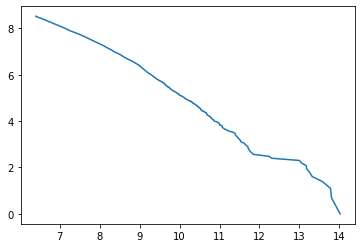

In [ ]:
# Power Low 
most_freq_5000=sorted(vocabulary.items(), key=lambda x: x[1], reverse=True)[1:5000]

import matplotlib.pyplot as plt

xs = [np.log(x[1]) for x in most_freq_5000]
ys = range(1,5000)
ys = np.log(ys)
plt.plot(xs, ys)
plt.show()

<a name='2'></a>
## N-gram based language models


In [ ]:
def count_n_grams(data, n, start_token='<s>', end_token = '<e>'):

    n_grams = {}
    
    for sentence in data:
        sentence = [start_token] * n + sentence + [end_token]
        sentence = tuple(sentence)
        
        for i in range(len(sentence)-n+1):
            n_gram = sentence[i:i+n]
            if n_gram in n_grams:
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1
    
    return n_grams

In [ ]:
# test
sentences = [['من','به','مدرسه','رفتم','.'],
             ['صبح', 'پاییزی', 'زیبای', 'شما', 'بخیر', 'باشد']]
print("Uni-gram:")
print(count_n_grams(sentences, 1))
print("Bi-gram:")
print(count_n_grams(sentences, 2))
print("Tri-gram:")
print(count_n_grams(sentences, 3))

Uni-gram:
{('<s>',): 2, ('من',): 1, ('به',): 1, ('مدرسه',): 1, ('رفتم',): 1, ('.',): 1, ('<e>',): 2, ('صبح',): 1, ('پاییزی',): 1, ('زیبای',): 1, ('شما',): 1, ('بخیر',): 1, ('باشد',): 1}
Bi-gram:
{('<s>', '<s>'): 2, ('<s>', 'من'): 1, ('من', 'به'): 1, ('به', 'مدرسه'): 1, ('مدرسه', 'رفتم'): 1, ('رفتم', '.'): 1, ('.', '<e>'): 1, ('<s>', 'صبح'): 1, ('صبح', 'پاییزی'): 1, ('پاییزی', 'زیبای'): 1, ('زیبای', 'شما'): 1, ('شما', 'بخیر'): 1, ('بخیر', 'باشد'): 1, ('باشد', '<e>'): 1}
Tri-gram:
{('<s>', '<s>', '<s>'): 2, ('<s>', '<s>', 'من'): 1, ('<s>', 'من', 'به'): 1, ('من', 'به', 'مدرسه'): 1, ('به', 'مدرسه', 'رفتم'): 1, ('مدرسه', 'رفتم', '.'): 1, ('رفتم', '.', '<e>'): 1, ('<s>', '<s>', 'صبح'): 1, ('<s>', 'صبح', 'پاییزی'): 1, ('صبح', 'پاییزی', 'زیبای'): 1, ('پاییزی', 'زیبای', 'شما'): 1, ('زیبای', 'شما', 'بخیر'): 1, ('شما', 'بخیر', 'باشد'): 1, ('بخیر', 'باشد', '<e>'): 1}


In [ ]:
def estimate_probability(word, previous_n_gram, 
                         n_gram_counts, n_plus1_gram_counts, vocabulary_size, k=1.0):

    # convert list to tuple to use it as a dictionary key
    previous_n_gram = tuple(previous_n_gram)
    #print(previous_n_gram)

    previous_n_gram_count = n_gram_counts.get(previous_n_gram , 0)
    denominator = previous_n_gram_count + k * vocabulary_size

    n_plus1_gram = previous_n_gram + (word,)
    n_plus1_gram_count = n_plus1_gram_counts.get(n_plus1_gram , 0)
        
    numerator = n_plus1_gram_count + k

    # Calculate the probability
    probability = numerator / denominator
        
    return probability

In [ ]:
# test
sentences = [['پاییزی','صبح','من','به','مدرسه','رفتم','.'],
             ['صبح', 'پاییزی', 'زیبای', 'شما', 'بخیر', 'باشد']]
unique_words = list(set(sentences[0] + sentences[1]))

unigram_counts = count_n_grams(sentences, 1)
bigram_counts = count_n_grams(sentences, 2)
tmp_prob = estimate_probability(" من به", " مدرسه", unigram_counts, bigram_counts, len(unique_words), k=1)

print(f"The estimated probability of word 'مدرسه' given the previous n-gram 'من به is: {tmp_prob:.4f}")

The estimated probability of word 'مدرسه' given the previous n-gram 'من به is: 0.0909


In [ ]:
def probs(previous_n_gram, n_gram_counts, n_plus1_gram_counts, vocabulary, k=1.0):
    """
    Returns:
        A dictionary mapping from next words to the probability.
    """
    #previous_n_gram = tuple(previous_n_gram)

    vocabulary = vocabulary + ["<e>", "<unk>"]
    vocabulary_size = len(vocabulary)
    
    probabilities = {}
    for word in vocabulary:
        probability = estimate_probability(word, previous_n_gram, 
                                           n_gram_counts, n_plus1_gram_counts, 
                                           vocabulary_size, k=k)
        probabilities[word] = probability

    return probabilities

In [ ]:
#test
#p=probs("من به",unigram_counts,bigram_counts,list(set(flat_list)),1)

In [ ]:
import pandas as pd
def make_count_matrix(n_plus1_gram_counts, vocabulary):

    vocabulary = vocabulary + ["<e>", "<unk>"]
    
    n_grams = []
    for n_plus1_gram in n_plus1_gram_counts.keys():
        n_gram = n_plus1_gram[0:-1]
        n_grams.append(n_gram)
    n_grams = list(set(n_grams))
    
    row_index = {n_gram:i for i, n_gram in enumerate(n_grams)}
    col_index = {word:j for j, word in enumerate(vocabulary)}
    
    nrow = len(n_grams)
    ncol = len(vocabulary)
    count_matrix = np.zeros((nrow, ncol))
    for n_plus1_gram, count in n_plus1_gram_counts.items():
        n_gram = n_plus1_gram[0:-1]
        word = n_plus1_gram[-1]
        if word not in vocabulary:
            continue
        i = row_index[n_gram]
        j = col_index[word]
        count_matrix[i, j] = count
    
    count_matrix = pd.DataFrame(count_matrix, index=n_grams, columns=vocabulary)
    return count_matrix

In [ ]:
# Show trigram counts
print('\ntrigram counts')
trigram_counts = count_n_grams(sentences, 3)
display(make_count_matrix(trigram_counts, unique_words))


trigram counts


,به,رفتم,زیبای,.,من,بخیر,شما,پاییزی,صبح,باشد,مدرسه,<e>,<unk>
"(من, به)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(پاییزی, زیبای)",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(صبح, پاییزی)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(صبح, من)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(<s>, <s>)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
"(زیبای, شما)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(بخیر, باشد)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"(<s>, صبح)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"(<s>, پاییزی)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(رفتم, .)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
def make_probability_matrix(n_plus1_gram_counts, vocabulary, k): # k is the smoothing value
    count_matrix = make_count_matrix(n_plus1_gram_counts, unique_words)
    count_matrix += k
    prob_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    return prob_matrix

In [ ]:
bigram_counts = count_n_grams(sentences, 2)
print("bigram probabilities")
display(make_probability_matrix(bigram_counts, unique_words, k=1))

bigram probabilities


,به,رفتم,زیبای,.,من,بخیر,شما,پاییزی,صبح,باشد,مدرسه,<e>,<unk>
"(به,)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429
"(باشد,)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429
"(مدرسه,)",0.071429,0.142857,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
"(من,)",0.142857,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
"(رفتم,)",0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
"(بخیر,)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429
"(زیبای,)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
"(پاییزی,)",0.066667,0.066667,0.133333,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.066667,0.066667,0.066667
"(.,)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429
"(<s>,)",0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.133333,0.066667,0.066667,0.066667,0.066667


In [ ]:
print("trigram probabilities")
trigram_counts = count_n_grams(sentences, 3)
display(make_probability_matrix(trigram_counts, unique_words, k=1))

trigram probabilities


,به,رفتم,زیبای,.,من,بخیر,شما,پاییزی,صبح,باشد,مدرسه,<e>,<unk>
"(من, به)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429
"(پاییزی, زیبای)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
"(صبح, پاییزی)",0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
"(صبح, من)",0.142857,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
"(<s>, <s>)",0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.133333,0.133333,0.066667,0.066667,0.066667,0.066667
"(زیبای, شما)",0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
"(بخیر, باشد)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429
"(<s>, صبح)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.071429,0.071429
"(<s>, پاییزی)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429,0.071429,0.071429,0.071429
"(رفتم, .)",0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.142857,0.071429


In [ ]:
def generate(previous_tokens, n_gram_counts, n_plus1_gram_counts, vocabulary, k=1.0):

    n = len(list(n_gram_counts.keys())[0]) 
    previous_n_gram = previous_tokens[-n:]
    probabilities = probs(previous_n_gram,
                                           n_gram_counts, n_plus1_gram_counts,
                                           vocabulary, k=k)
    suggestion = None
    max_prob = 0
    
    for word, prob in probabilities.items():

          if probabilities[word]>max_prob:            
            suggestion = word            
            max_prob = probabilities[word]
    
    return suggestion, max_prob

In [ ]:
token_list = [t.split() for t in train_cleaned_list]
n_gram_counts = count_n_grams(token_list, 2 , start_token='<s>', end_token = '<e>')
n_plus1_gram_counts = count_n_grams(token_list, 3, start_token='<s>', end_token = '<e>')

## N-gram Class


In [ ]:
class N_gram_language_model:

  def __init__(self, n , smoothing  , corpus_dir ):
    self.n = n
    self.smoothing = smoothing
    self.corpus_dir = corpus_dir
    #self.n_gram_counts , self.n_plus1_gram_counts = self.train(train_cleaned_list)
    self.n_gram_counts = n_gram_counts
    self.n_plus1_gram_counts = n_plus1_gram_counts
    self.vocab=vocabulary

  def train(self, train_list):

    token_list = [t.split() for t in train_list]
    n_gram_counts = count_n_grams(token_list, self.n , start_token='<s>', end_token = '<e>')
    n_plus1_gram_counts = count_n_grams(token_list, self.n+1, start_token='<s>', end_token = '<e>')
    return n_gram_counts,n_plus1_gram_counts

  def prob(self, inp ):

    if self.smoothing == 'laplace':
      k=1
    elif self.smoothing == False:
      k=0
    i = inp.split()
    prob = estimate_probability(i[-1] , i[-(self.n+1): -1], self.n_gram_counts, self.n_plus1_gram_counts, len(list(set(flat_list))), k)
    return prob

  def generate(self, inp ):

    if self.smoothing == 'laplace':
      k=1
    elif self.smoothing == False:
      k=0
    
    suggestion,max_prob = generate(inp.split(), self.n_gram_counts, self.n_plus1_gram_counts, list(set(flat_list)), k)
    return suggestion



In [ ]:
model=N_gram_language_model(n=2,smoothing = 'laplace',corpus_dir ='')

In [ ]:
suggestion = model.generate(' کنفرانس مطبوعاتی ')

In [ ]:
suggestion

'مشترک'

In [ ]:
suggestion = model.generate(' رهبر معظم انقلاب ')
suggestion

'اسلامی'

In [ ]:
suggestion,max_prob = generate('برای جلوگیری از اقدامات دونالد ترامپ رئیس'.split(), n_gram_counts, n_plus1_gram_counts, list(set(flat_list)), 2)
print('The suggestion for the next word is : '+suggestion)
print('Probability is : ' + str(max_prob))

The suggestion for the next word is : جمهور
Probability is : 0.04727358937885254


In [ ]:
p=model.prob('ترامپ رئیس جمهور')
p

0.089851150202977

In [ ]:
n_gram_counts

{('<s>', '<s>'): 974563,
 ('<s>', 'به'): 23036,
 ('به', 'گزارش'): 85535,
 ('گزارش', 'گروه'): 30158,
 ('گروه', 'وبگردی'): 3462,
 ('وبگردی', 'باشگاه'): 3434,
 ('باشگاه', 'خبرنگاران'): 59479,
 ('خبرنگاران', 'جوان'): 58696,
 ('جوان', 'به'): 4713,
 ('به', 'نظر'): 5520,
 ('نظر', 'میرسد'): 3094,
 ('میرسد', 'دور'): 3,
 ('دور', 'تازه'): 17,
 ('تازه', 'حملات'): 3,
 ('حملات', 'جمهوری'): 1,
 ('جمهوری', 'خواهان'): 72,
 ('خواهان', 'ایالات'): 1,
 ('ایالات', 'متحده'): 1563,
 ('متحده', 'به'): 87,
 ('به', 'توییتر'): 4,
 ('توییتر', 'باعث'): 1,
 ('باعث', '<unk>'): 928,
 ('<unk>', 'شدن'): 3162,
 ('شدن', 'عصبانیت'): 2,
 ('عصبانیت', 'دونالد'): 4,
 ('دونالد', 'ترامپ'): 3157,
 ('ترامپ', 'نیز'): 80,
 ('نیز', 'شده'): 110,
 ('شده', 'و'): 20038,
 ('و', 'او'): 1510,
 ('او', 'نیز'): 342,
 ('نیز', 'در'): 11055,
 ('در', 'اظهار'): 46,
 ('اظهار', 'نظری'): 91,
 ('نظری', 'جدید'): 2,
 ('جدید', 'اعلام'): 41,
 ('اعلام', 'کرده'): 2455,
 ('کرده', 'که'): 2151,
 ('که', 'توییتر'): 3,
 ('توییتر', '<unk>'): 20,
 ('<unk>', '<unk>'):

In [ ]:
n_plus1_gram_counts

{('<s>', '<s>', '<s>'): 974563,
 ('<s>', '<s>', 'به'): 23036,
 ('<s>', 'به', 'گزارش'): 5717,
 ('به', 'گزارش', 'گروه'): 29971,
 ('گزارش', 'گروه', 'وبگردی'): 3409,
 ('گروه', 'وبگردی', 'باشگاه'): 3408,
 ('وبگردی', 'باشگاه', 'خبرنگاران'): 3432,
 ('باشگاه', 'خبرنگاران', 'جوان'): 58601,
 ('خبرنگاران', 'جوان', 'به'): 4444,
 ('جوان', 'به', 'نظر'): 14,
 ('به', 'نظر', 'میرسد'): 3078,
 ('نظر', 'میرسد', 'دور'): 2,
 ('میرسد', 'دور', 'تازه'): 1,
 ('دور', 'تازه', 'حملات'): 2,
 ('تازه', 'حملات', 'جمهوری'): 1,
 ('حملات', 'جمهوری', 'خواهان'): 1,
 ('جمهوری', 'خواهان', 'ایالات'): 1,
 ('خواهان', 'ایالات', 'متحده'): 1,
 ('ایالات', 'متحده', 'به'): 79,
 ('متحده', 'به', 'توییتر'): 1,
 ('به', 'توییتر', 'باعث'): 1,
 ('توییتر', 'باعث', '<unk>'): 1,
 ('باعث', '<unk>', 'شدن'): 139,
 ('<unk>', 'شدن', 'عصبانیت'): 1,
 ('شدن', 'عصبانیت', 'دونالد'): 1,
 ('عصبانیت', 'دونالد', 'ترامپ'): 4,
 ('دونالد', 'ترامپ', 'نیز'): 6,
 ('ترامپ', 'نیز', 'شده'): 1,
 ('نیز', 'شده', 'و'): 10,
 ('شده', 'و', 'او'): 46,
 ('و', 'او', 'نیز'): 6